In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Synthetic data
N = 1000
X = np.random.random((N,2))*6 - 3
Y = np.sin(2*X[:,0]) + np.sin(3*X[:,1])

In [3]:
Y.shape

(1000,)

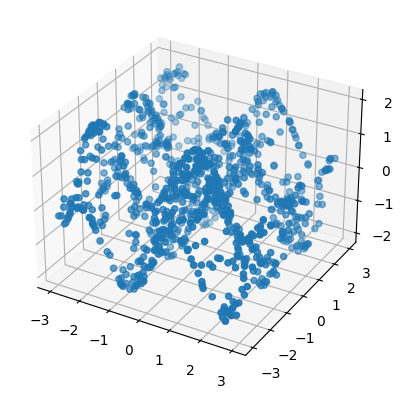

In [4]:
from matplotlib import projections
#Plot

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()


In [5]:
X.shape

(1000, 2)

In [6]:

X_tensor = torch.from_numpy(X.astype('float32'))
Y_tensor = torch.from_numpy(Y.astype('float32')).reshape(-1,1)

In [7]:
Y_tensor.shape

torch.Size([1000, 1])

In [8]:
#model

# model = nn.Sequential(nn.Linear(2,128),nn.ReLU(),nn.Linear(128,1))

class model(nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.layer1  = nn.Linear(2,128)
    self.layer2 = nn.ReLU()
    self.layer3 = nn.Linear(128,1)



  def forward(self,x):

    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
  

    return out




In [9]:
model = model()

In [10]:
criterion  = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [11]:
#training



epochs = 1000
losses = np.zeros(epochs)

for i in range(epochs):

  optimizer.zero_grad()

  outputs = model(X_tensor)

  loss = criterion(outputs,Y_tensor)

  loss.backward()

  optimizer.step()

 
  losses[i] = loss.item()

  print(f"epoch 1/{i+1} -- training loss -- {loss}")




epoch 1/1 -- training loss -- 1.094305157661438
epoch 1/2 -- training loss -- 0.9934674501419067
epoch 1/3 -- training loss -- 1.0251208543777466
epoch 1/4 -- training loss -- 0.9800240993499756
epoch 1/5 -- training loss -- 0.9311786890029907
epoch 1/6 -- training loss -- 0.9153916835784912
epoch 1/7 -- training loss -- 0.9279611110687256
epoch 1/8 -- training loss -- 0.9213991761207581
epoch 1/9 -- training loss -- 0.8935951590538025
epoch 1/10 -- training loss -- 0.8641684651374817
epoch 1/11 -- training loss -- 0.8440897464752197
epoch 1/12 -- training loss -- 0.8358758091926575
epoch 1/13 -- training loss -- 0.8281499743461609
epoch 1/14 -- training loss -- 0.810598611831665
epoch 1/15 -- training loss -- 0.7878957390785217
epoch 1/16 -- training loss -- 0.7673779129981995
epoch 1/17 -- training loss -- 0.7525237202644348
epoch 1/18 -- training loss -- 0.7413517832756042
epoch 1/19 -- training loss -- 0.7264348268508911
epoch 1/20 -- training loss -- 0.7055233120918274
epoch 1/21 

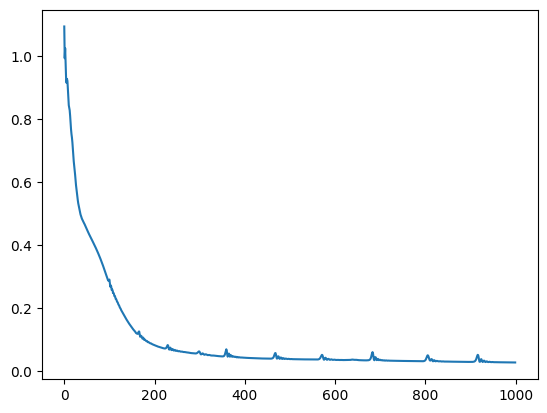

In [12]:
plt.plot(losses)
plt.show()

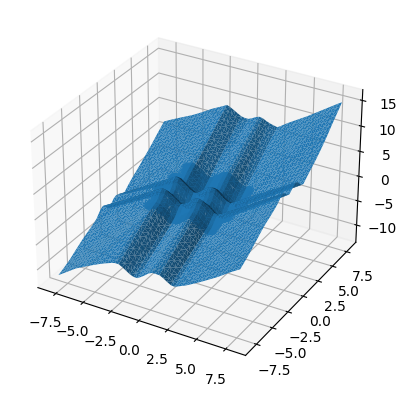

In [13]:
# plotting the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#prediction surface

line = np.linspace(-8,8,50)
xx1,xx2 = np.meshgrid(line,line)
Xgrid = np.vstack((xx1.flatten(),xx2.flatten())).T
Xgrid_torch = torch.from_numpy(Xgrid.astype('float32'))
y_hat = model(Xgrid_torch).detach().numpy().flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],y_hat,linewidth = 0.2, antialiased = True)
plt.show()